# To install

In [3]:
import pandas as pd
import seaborn as sns

# Pre analysis

In [4]:
data = "group21_alltogether.csv"

df = pd.read_csv(data)

In [5]:
df.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
0,485,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 16:57:47,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
1,488,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,http://localhost/group11/,2024-06-14 17:04:36,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
2,489,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:17:38,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
3,492,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:19:24,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
4,497,3,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,1.5,2024-06-15 20:56:12,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data


In [6]:
df.shape

(136, 57)

In [7]:
df.columns

Index(['userid', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'age', 'gender', 'device', 'education', 'time', 'condition',
       'prolific', 'timestart', 'genre', 'consent', 'mancheck1', 'mancheck2',
       'calibrationid', 'recommendationid', '_merge'],
      dtype='object')

In [8]:
df.dtypes

userid                int64
Q2                    int64
Q3                    int64
Q4                    int64
Q5                    int64
Q6                  float64
Q7                  float64
Q8                  float64
Q9                  float64
Q10                 float64
Q11                 float64
Q12                 float64
Q13                 float64
Q14                 float64
Q15                 float64
Q16                 float64
Q17                 float64
Q18                 float64
Q19                 float64
Q20                 float64
Q21                 float64
Q22                 float64
Q23                 float64
Q24                 float64
Q25                 float64
Q26                 float64
Q27                 float64
Q28                 float64
Q29                 float64
Q30                 float64
Q31                 float64
Q32                 float64
Q33                 float64
Q34                 float64
Q35                 float64
Q36                 

## Dropping the users that answered before 2024-06-21 14:00

In [9]:
#first checking the column
df["timestart"].describe()

count                     136
unique                    136
top       2024-06-14 16:57:47
freq                        1
Name: timestart, dtype: object

In [10]:
df["timestart"].max()

'2024-06-23 23:47:10'

In [11]:
df["timestart"].min()

'2024-06-14 16:57:47'

In [12]:
#Convert the date
df['timestart'] = pd.to_datetime(df['timestart'])

In [13]:
df['timestart']

0     2024-06-14 16:57:47
1     2024-06-14 17:04:36
2     2024-06-14 17:17:38
3     2024-06-14 17:19:24
4     2024-06-15 20:56:12
              ...        
131   2024-06-22 21:18:03
132   2024-06-23 01:38:36
133   2024-06-23 15:17:58
134   2024-06-23 16:17:09
135   2024-06-23 23:47:10
Name: timestart, Length: 136, dtype: datetime64[ns]

In [14]:
 # Filter data between two dates -> used this https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/
filtered_df = df.loc[(df['timestart'] >= '2024-06-21 14:00')
                     & (df['timestart'] <= '2024-06-23 23:47:10')]

In [15]:
filtered_df.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
50,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:06:27,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data
51,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:29:48,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data
52,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,0,https://recipe-study.wur.nl/gr,2024-06-21 14:33:58,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data
53,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:35:16,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data
54,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:39:19,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data


In [16]:
#checking it worked 
df["timestart"].min()

Timestamp('2024-06-14 16:57:47')

In [17]:
df["timestart"].max()

Timestamp('2024-06-23 23:47:10')

In [18]:
print(f'Original df was {df.shape}')
print(f'Filtered df is {filtered_df.shape}')

Original df was (136, 57)
Filtered df is (86, 57)


In [19]:
print(f'Removed {len(df)-len(filtered_df)} values from the original DF')

Removed 50 values from the original DF


In [20]:
#saving to csv
filtered_df.to_csv("removed_dates.csv", index = False)

## Removing those who did not consent and are under 18

In [21]:
data = "removed_dates.csv"

df = pd.read_csv(data)

In [22]:
df_consent = df[(df["consent"] == 1) & (df["age"] >= 18)]

In [23]:
print(f'Removed {len(df)-len(df_consent)} values from the original DF')

Removed 10 values from the original DF


In [24]:
#saving those that consented, and are above 18 to a csv
df_consent.to_csv("consent.csv", index = False)

## Removing Data based on Prolific

In [25]:
df=pd.read_csv("consent.csv")

In [26]:
df['prolific'].value_counts()

prolific
https://recipe-study.wur.nl/gr                          68
https://recipe-study.wur.nl/group21_bookrecommender/     5
fbclid=PAZXh0bgNhZW0CMTEAAab6i                           1
fbclid=PAZXh0bgNhZW0CMTEAAabVk                           1
fbclid=PAZXh0bgNhZW0CMTEAAaY85                           1
Name: count, dtype: int64

In [27]:
values_to_keep = ['https://recipe-study.wur.nl/gr']

filtered_df = df[df['prolific'].isin(values_to_keep)]

In [28]:
filtered_df['prolific'].value_counts()

prolific
https://recipe-study.wur.nl/gr    68
Name: count, dtype: int64

In [29]:
print(f'Original df was {df.shape}')
print(f'Filtered df is {filtered_df.shape}')

Original df was (76, 57)
Filtered df is (68, 57)


In [30]:
filtered_df.to_csv("prolific.csv", index = False)

## Changing column names

In [31]:
df = pd.read_csv("prolific.csv")

In [32]:
df.columns

Index(['userid', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'age', 'gender', 'device', 'education', 'time', 'condition',
       'prolific', 'timestart', 'genre', 'consent', 'mancheck1', 'mancheck2',
       'calibrationid', 'recommendationid', '_merge'],
      dtype='object')

In [33]:
df.rename(columns={'Q2': 'satisfaction_1', 'Q3': 'satisfaction_2', 'Q4': 'satisfaction_3', 'Q5': 'satisfaction_4', 'Q6': 'satisfaction_5', 'Q7': 'satisfaction_6'}, inplace=True)

In [34]:
df.rename(columns={'Q8': 'credibility_1', 'Q9': 'credibility_2', 'Q10': 'credibility_3', 'Q11': 'credibility_4', 'Q12': 'credibility_5', 'Q13': 'credibility_6', 'Q14': 'credibility_7', 'Q15': 'credibility_8', 'Q16': 'credibility_9', 'Q17': 'credibility_10', 'Q18': 'credibility_11', 'Q19': 'credibility_12'}, inplace=True)

In [35]:
df.rename(columns={'Q20': 'motivation_1', 'Q21': 'motivation_2', 'Q22': 'motivation_3', 'Q23': 'motivation_4', 'Q24': 'motivation_5', 'Q25': 'motivation_6', 'Q26': 'motivation_7', 'Q27': 'motivation_8', 'Q28': 'motivation_9', 'Q29': 'motivation_10', 'Q30': 'motivation_11', 'Q31': 'motivation_12'}, inplace=True)

In [36]:
df.rename(columns={'Q32': 'anthropomorphism_1', 'Q33': 'anthropomorphism_2', 'Q34': 'anthropomorphism_3', 'Q35': 'anthropomorphism_4'}, inplace=True)

In [37]:
df.rename(columns={'Q36': 'control(reading_habits)', 'Q37': 'control(previous_experience_with_RS)'}, inplace=True)

In [38]:
df.rename(columns={'Q38': 'conscientiousness_1', 'Q39': 'conscientiousness_2', 'Q40': 'conscientiousness_3', 'Q41': 'conscientiousness_4', 'Q42': 'conscientiousness_5'}, inplace=True)

In [39]:
df.columns

Index(['userid', 'satisfaction_1', 'satisfaction_2', 'satisfaction_3',
       'satisfaction_4', 'satisfaction_5', 'satisfaction_6', 'credibility_1',
       'credibility_2', 'credibility_3', 'credibility_4', 'credibility_5',
       'credibility_6', 'credibility_7', 'credibility_8', 'credibility_9',
       'credibility_10', 'credibility_11', 'credibility_12', 'motivation_1',
       'motivation_2', 'motivation_3', 'motivation_4', 'motivation_5',
       'motivation_6', 'motivation_7', 'motivation_8', 'motivation_9',
       'motivation_10', 'motivation_11', 'motivation_12', 'anthropomorphism_1',
       'anthropomorphism_2', 'anthropomorphism_3', 'anthropomorphism_4',
       'control(reading_habits)', 'control(previous_experience_with_RS)',
       'conscientiousness_1', 'conscientiousness_2', 'conscientiousness_3',
       'conscientiousness_4', 'conscientiousness_5', 'age', 'gender', 'device',
       'education', 'time', 'condition', 'prolific', 'timestart', 'genre',
       'consent', 'manch

In [40]:
#save to df
df.to_csv("renamed.csv", index = False)

# Removing NA

In [41]:
df = pd.read_csv("renamed.csv")

In [42]:
df_na = df.dropna()

In [43]:
print(f'Original df was {df.shape}')
print(f'Filtered df is {df_na.shape}')

Original df was (68, 57)
Filtered df is (66, 57)


# removing -1 value

In [44]:
df_one= df_na[df_na['mancheck1'] != -1]

In [45]:
print(f'Original df was {df_na.shape}')
print(f'Checking if one was removed from df {df_one.shape}')

Original df was (66, 57)
Checking if one was removed from df (65, 57)


In [46]:
#saving again
df_one.to_csv("removed.csv", index = False)

# Making variable - device type (just for my analysis)

In [47]:
df = pd.read_csv("removed.csv")

In [48]:
len(df)

65

In [49]:
#making device type -> using code from the notebook (only necessary for my analysis)

def makemygroups(row):     
    #any combination of contitions can be entered here     
    if row['device'] == 1:        
        return "computer"     
    else:         
        return "non-computer"      


df['device_type'] = df.apply(makemygroups,axis=1) 
df['device_type'].value_counts()

device_type
non-computer    58
computer         7
Name: count, dtype: int64

<Axes: xlabel='device_type', ylabel='count'>

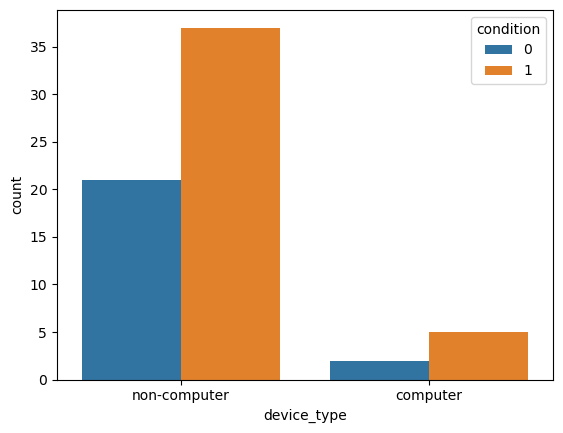

In [50]:
sns.countplot(data = df, x = "device_type",  hue = "condition")

In [51]:
#saving to final csv

df.to_csv("final_cleaned.csv", index = False)